In [2]:
import sys 
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
import pickle
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

from speclib import misc, plotting, loaders

%matplotlib inline 

In [3]:
ua = loaders.Useralias()
with open('../../allan_data/binned_user_bluetooth.pkl', 'br') as fid:
    res = pickle.load(fid)

res2 = list()
for v in res.values():
    if v is not None:
        res2.append(v)

print(len(res2) / len(res))
del res
df = pd.concat(res2)
del res2

df.head() 

0.7979225684608121


scanned_user
user  timestamp                                                             
u0182 2013-12-10 04:30:00  {634f3bd62b481bc4ee0332b1e34f20995d1b74758aaeb...
      2013-12-10 06:00:00  {89bcd6850fda4863c29a652250d4a5d58215af544b91f...
      2013-12-10 07:30:00                                                NaN
      2013-12-10 09:00:00                                                NaN
      2013-12-10 10:30:00                                                NaN

Count fraction of time where users are together with other users for…
1. All time
2. The first 6 months after they goet the phone, where the questionaire must be most relevant

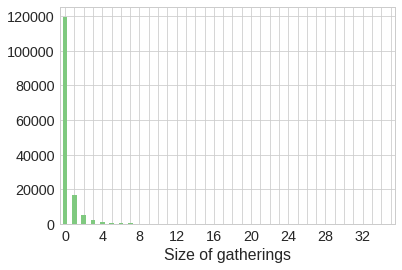

In [8]:
# Plot using sane xticks
ax = df.scanned_user.dropna().map(len).value_counts().plot.bar(rot=0) 
xticks = ax.get_xticks()  
xticks = np.arange(xticks.min(), xticks.max()+1, 4)
ax.set_xticklabels([str(i) if i in xticks else '' for i in range(max(xticks+1))])
ax.set_xlabel("Size of gatherings") 

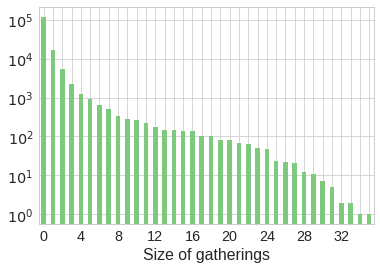

In [9]:
# Sane xticks AND log-y scale
ax = df.scanned_user.dropna().map(len).value_counts().plot.bar(rot=0) 
ax.set_yscale('log')
xticks = ax.get_xticks()  
xticks = np.arange(xticks.min(), xticks.max()+1, 4)
ax.set_xticklabels([str(i) if i in xticks else '' for i in range(max(xticks+1))])
ax.set_xlabel("Size of gatherings") 

In [10]:
current_users = df.index.get_level_values('user').unique().tolist() 

len(current_users)

845

In [11]:
socializing_df = pd.DataFrame(index=current_users, columns="alltime halfyear afterhalfyear".split())

for i, user in enumerate(current_users):
    if i % 50 == 0:
        print(f"Processing user {user} {i} of {len(current_users)}")
    tmp = df.loc[user]
    socializing_df.loc[user, 'alltime'] = tmp.scanned_user.count()/tmp.shape[0] 
    mask = tmp.index <= tmp.index[0] + pd.Timedelta(365//2, unit='D')
    socializing_df.loc[user, 'halfyear'] = tmp[mask].scanned_user.count()/tmp.shape[0] 
    socializing_df.loc[user, 'afterhalfyear'] = tmp[~mask].scanned_user.count()/tmp.shape[0] 
print("Done!")
socializing_df.head(12) 

Processing user u0182 0 of 845
Processing user u0294 50 of 845
Processing user u0931 100 of 845
Processing user u0726 150 of 845
Processing user u0596 200 of 845
Processing user u0999 250 of 845
Processing user u0884 300 of 845
Processing user u0745 350 of 845
Processing user u0169 400 of 845
Processing user u0356 450 of 845
Processing user u0105 500 of 845
Processing user u0673 550 of 845
Processing user u0530 600 of 845
Processing user u0435 650 of 845
Processing user u0500 700 of 845
Processing user u0008 750 of 845
Processing user u0557 800 of 845
Done!


,alltime,halfyear,afterhalfyear
u0182,0.0798784,0.0353809,0.0444975
u1015,0.0450921,0.0390432,0.00604894
u0778,0.0530124,0.0118133,0.0411991
u0933,0.0371535,0.024769,0.0123845
u0256,0.0562025,0.0417722,0.0144304
u0659,0.328704,0.328704,0
u0719,0.0314583,0.0242602,0.00719808
u0709,0.0794855,0.0758575,0.00362797
u0748,0.0770381,0.0770381,0
u0045,0.0394637,0.0321275,0.0073362


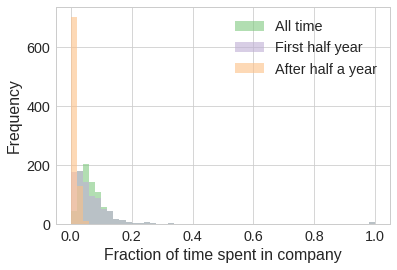

In [12]:
nBins = 50

ax = socializing_df.plot.hist(bins=nBins, alpha=0.6)
ax.legend(labels=["All time", "First half year", "After half a year"])
ax.set_xlabel("Fraction of time spent in company")

In [13]:
socializing_df.max() 

alltime          1.000000
halfyear         1.000000
afterhalfyear    0.049429
dtype: float64

In [14]:
(socializing_df.alltime == 1).sum() 

6

In [15]:
socializing_df = socializing_df.drop(socializing_df[socializing_df.alltime == 1].index)

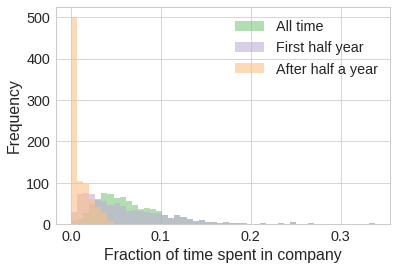

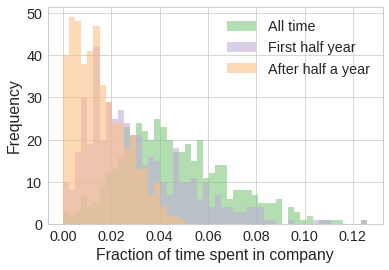

In [22]:

ax = socializing_df.plot.hist(bins=nBins, alpha=0.6)
ax.legend(labels=["All time", "First half year", "After half a year"])
ax.set_xlabel("Fraction of time spent in company") 

# plot with 0-encounters removed from the data
tmp = socializing_df[socializing_df.afterhalfyear != 0]
ax = tmp.plot.hist(bins=nBins, alpha=0.6)
ax.legend(labels=["All time", "First half year", "After half a year"])
ax.set_xlabel("Fraction of time spent in company") 

In [135]:
tmp = df.loc['u0182']

In [136]:
cnt_persons = tmp.scanned_user.map(lambda el: len(el) if isinstance(el, set) else 0)
cnt_null = tmp.scanned_user.isnull() 

# <font color="red">Figure out to use `sum` or `mean`? </font>

## Mean preserves the magnitude of the summed encounters on the original time scale

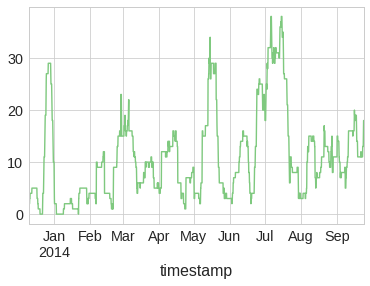

In [137]:
cntp = cnt_persons.rolling('7D', min_periods=1).sum()
ax = cntp.plot() 

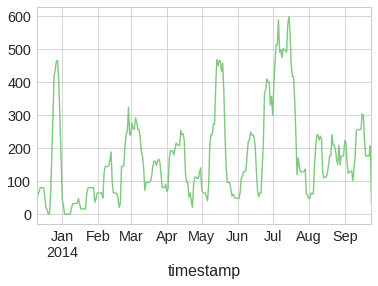

In [138]:
cntp_1day = cntp.resample('1D').sum()
cntp_1day.plot() 

In [139]:
cntp.head() 

timestamp
2013-12-10 04:30:00    1.0
2013-12-10 06:00:00    2.0
2013-12-10 07:30:00    2.0
2013-12-10 09:00:00    2.0
2013-12-10 10:30:00    2.0
Name: scanned_user, dtype: float64

In [141]:
lst = list()
for i, user in enumerate(current_users):
    if i % 50 == 0:
        print(f"Processing user {user} {i} of {len(current_users)}")
    tmp = df.loc[user]
    cnt_persons = tmp.scanned_user.map(lambda el: len(el) if isinstance(el, set) else 0)
    cnt_null = tmp.scanned_user.isnull() 
    cntp = cnt_persons.rolling('7D', min_periods=1).sum()
    cntp.name = user
    lst.append(pd.DataFrame(cntp, columns=[user]))
print("Done!")

df_interaction = lst[0]
df_interaction = df_interaction.join(lst[1:]) 
del lst

Processing user u0182 0 of 845
Processing user u0294 50 of 845
Processing user u0931 100 of 845
Processing user u0726 150 of 845
Processing user u0596 200 of 845
Processing user u0999 250 of 845
Processing user u0884 300 of 845
Processing user u0745 350 of 845
Processing user u0169 400 of 845
Processing user u0356 450 of 845
Processing user u0105 500 of 845
Processing user u0673 550 of 845
Processing user u0530 600 of 845
Processing user u0435 650 of 845
Processing user u0500 700 of 845
Processing user u0008 750 of 845
Processing user u0557 800 of 845
Done!


In [170]:
df_interaction_daily = df_interaction.groupby(df_interaction.index.map(lambda dt: dt.date())).sum()

In [171]:
df_interaction.shape

(4607, 845)

In [172]:
df_interaction_daily.shape

(289, 845)

In [173]:
print(*df_interaction_daily.index[:6], sep='\n')

2013-12-10
2013-12-11
2013-12-12
2013-12-13
2013-12-14
2013-12-15


In [179]:
(df_interaction_daily.index[-1] - df_interaction_daily.index[0]).days 

288

In [181]:
df_interaction.to_msgpack('../../allan_data/bluetooth_interaction_df.msgpack')
df_interaction_daily.to_msgpack('../../allan_data/bluetooth_interaction_daily_df.msgpack')

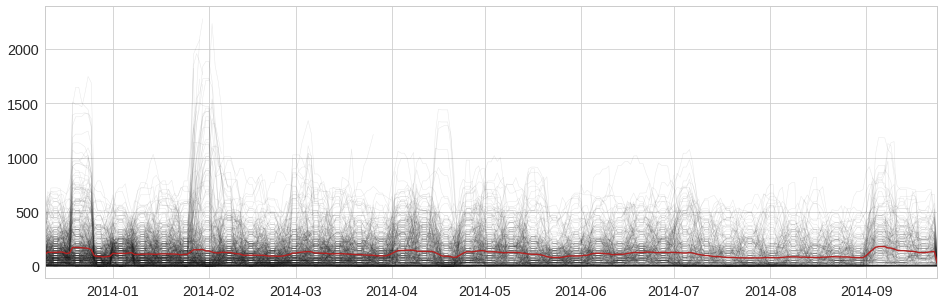

In [180]:
fig, ax = plt.subplots(figsize=(16, 5))
df_interaction_daily.plot(color='k', alpha=0.1, lw=0.5, legend=False, ax=ax) 
df_interaction_daily.mean(axis=1).plot(ax=ax, color='firebrick', label='Mean') 

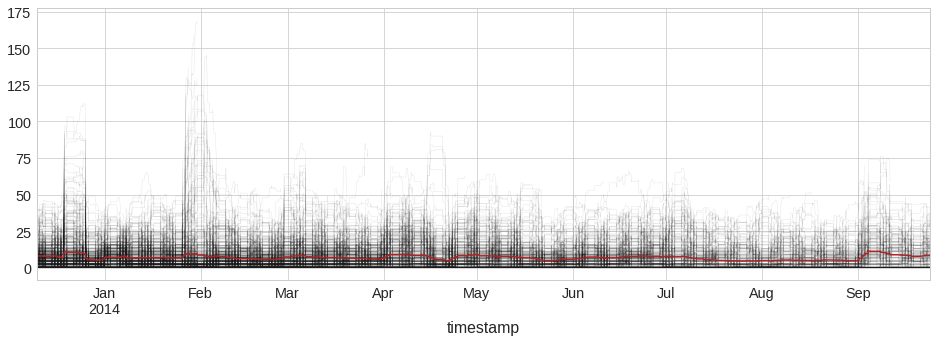

In [123]:
fig, ax = plt.subplots(figsize=(16, 5))
df_interaction.plot(color='k', alpha=0.1, lw=0.5, legend=False, ax=ax) 
df_interaction.mean(axis=1).plot(ax=ax, color='firebrick', label='Mean') 